In [16]:
import pandas as pd  
import matplotlib.pyplot as plt  
import joblib  
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score, classification_report  
from sklearn.tree import plot_tree  


In [18]:
# Cargar el dataset
df_wine = pd.read_csv("G:/Otros ordenadores/Portátil/UNAD/Semestre 6/Análisis de datos/3/wine/winequality-red.csv")

In [28]:
df_wine.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [20]:
# Mostrar las primeras filas
print(df_wine.head())

# Información del dataset
print("\nInformación del dataset:")
print(df_wine.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df_wine.isnull().sum())

# Estadísticas generales
print("\nResumen estadístico:")
print(df_wine.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [22]:


# Separar características (X) y variable objetivo (y)
X = df_wine.drop(columns=["quality"])  # Eliminamos la columna objetivo
y = df_wine["quality"]  # Variable a predecir

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTamaño de los datos de entrenamiento:", X_train.shape)
print("Tamaño de los datos de prueba:", X_test.shape)



Tamaño de los datos de entrenamiento: (1279, 11)
Tamaño de los datos de prueba: (320, 11)


In [24]:
# Crear y entrenar el modelo
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Precisión del modelo: 0.559375

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.76      0.67       130
           6       0.55      0.49      0.52       132
           7       0.45      0.36      0.40        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.27      0.27      0.26       320
weighted avg       0.53      0.56      0.54       320



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


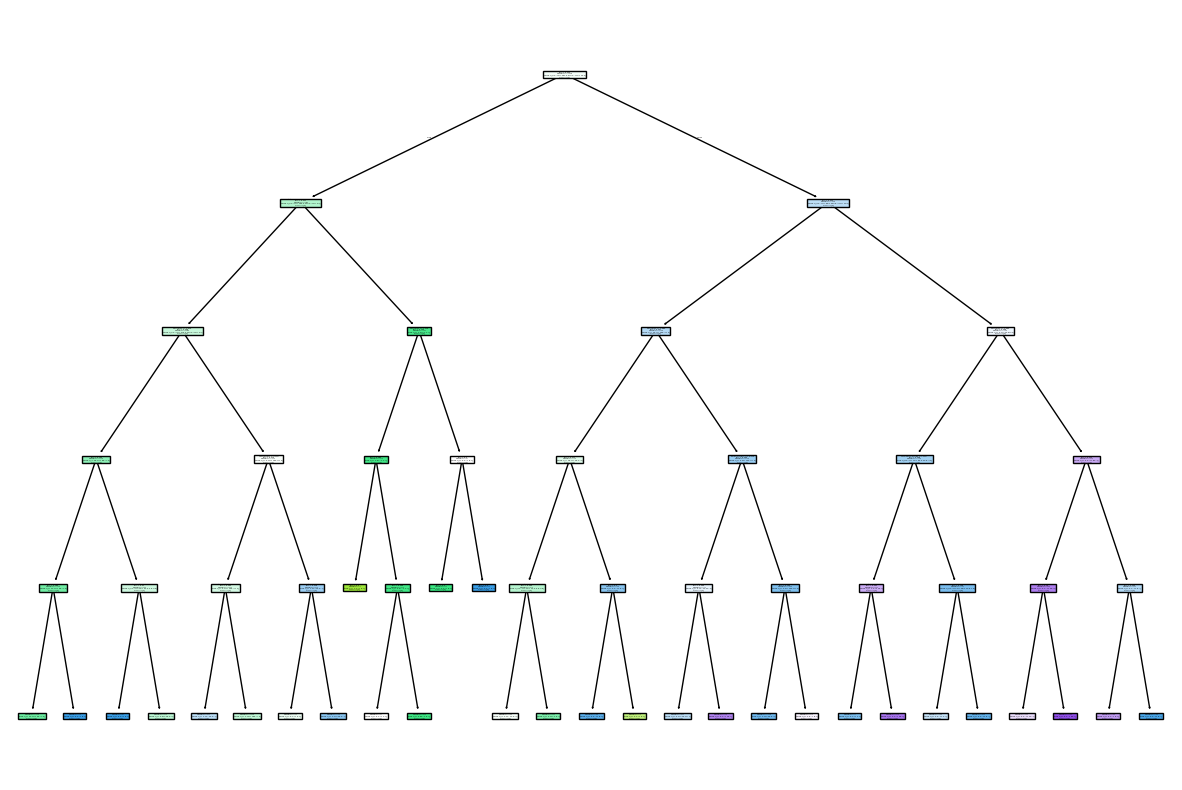

In [26]:


# Graficar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(modelo, feature_names=X.columns, class_names=True, filled=True)
plt.show()


In [ ]:


# Guardar el modelo
joblib.dump(modelo, "modelo_arbol_vino.pkl")

print("Modelo guardado como 'modelo_arbol_vino.pkl'")
